In [2]:
!conda install scikit-image --yes


Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /home/animesh/miniconda3

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.6.0                  |       h6a678d5_0         2.8 MB
    blosc-1.21.3               |       h6a678d5_0          63 KB
    brunsli-0.1                |       h2531618_0         164 KB
    ca-certificates-2023.12.12 |       h06a4308_0         126 KB
    certifi-2023.11.17         |  py310h06a4308_0         158 KB
    cfitsio-3.470              |       h5893167_7         833 KB
    charls-2.2.0               |       h2531618_0         117 KB
    cloudpickle-2.2.1          |  py310h06a4308_0          42 KB
    cytoolz-0.12.2             |  py310h5eee18b_0         389 KB
    dask-core-2023.11.0        |  py310h06a4308_0         2.1 MB
    dav1d-1.2.1         

[[ 3  3  2]
 [ 2  3 -2]]
U:  [[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]
Singular array [5.54801894 2.86696457]
V^{T} [[ 0.64749817  0.7599438   0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


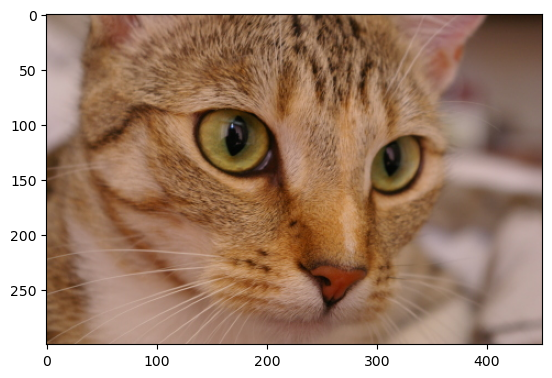

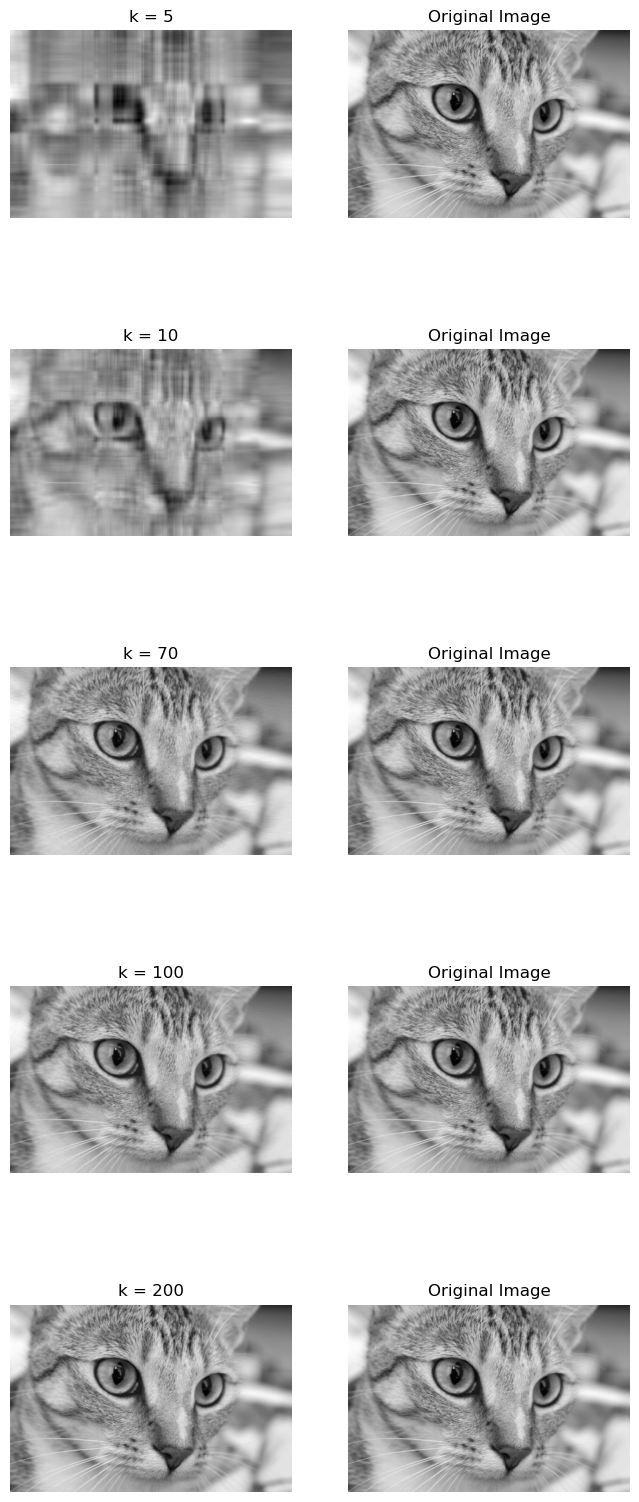

In [3]:
# Imports

from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

"""
Singular Value Decomposition
"""
# define a matrix
X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)
# perform SVD
U, singular, V_transpose = svd(X)
# print different components
print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)

"""
Calculate Pseudo inverse
"""
# inverse of singular matrix is just the reciprocal of each element
singular_inv = 1.0 / singular
# create m x n matrix of zeroes and put singular values in it
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
# calculate pseudoinverse
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print(M)

"""
SVD on image compression
"""


cat = data.chelsea()
plt.imshow(cat)
# convert to grayscale
gray_cat = rgb2gray(cat)

# calculate the SVD and plot the image
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()

In [4]:
import numpy as np

data = np.array([[1, 2], [3, 4], [5, 6]])
U, S, VT = np.linalg.svd(data, full_matrices=False)

In [5]:
k = 1
Uk = U[:, :k]
Sk = np.diag(S[:k])
VTk = VT[:k, :]

In [6]:
X_reduced = Uk @ Sk @ VTk
X_reduced

array([[1.35662819, 1.71846235],
       [3.09719707, 3.92326845],
       [4.83776596, 6.12807454]])